In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline

In [3]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [4]:
%load_ext autoreload
%autoreload 2

In [20]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 600 #in second
params.dist_threshold = 10000 #in meter
params.dist_threshold_min = 1000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 2

params.nP = 1000
params.nV = 200
params.simTime = 8

In [21]:
sim = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline)

19-04-22 22:27:53-WARNING-Setting up 8h simulation at 2022-04-19 18:28:18 for 200 vehicles and 1000 passengers in Amsterdam, Netherlands
19-04-22 22:27:57-INFO--------------------	Starting simulation	-------------------
19-04-22 22:27:59-INFO-pax    1  got to dest at                           2022-04-19 18:35:22
19-04-22 22:27:59-INFO-pax    3  got to dest at                           2022-04-19 18:35:33
19-04-22 22:27:59-WARNING-pax   13  got rejected by vehicle 92               2022-04-19 18:35:39
19-04-22 22:27:59-WARNING-pax   13  got rejected by vehicle 88               2022-04-19 18:35:39
19-04-22 22:27:59-WARNING-pax   13  got rejected by vehicle 29               2022-04-19 18:35:39
19-04-22 22:27:59-INFO-pax    6  got to dest at                           2022-04-19 18:36:22
19-04-22 22:27:59-WARNING-pax   15  got rejected by vehicle 30               2022-04-19 18:38:24
19-04-22 22:27:59-INFO-pax    2  got to dest at                           2022-04-19 18:38:24
19-04-22 22:27:5

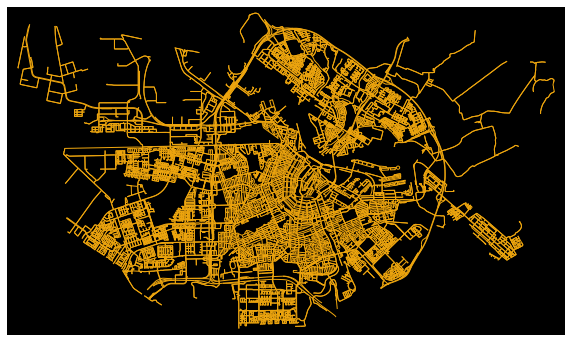

In [38]:
G = sim.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

In [25]:
pd.DataFrame(sim.vehs[24].myrides)

,veh,pos,t,event,paxes
0,24,4.640959e+07,0,STARTS_DAY,[]
1,24,4.640959e+07,0,OPENS_APP,[]
2,24,4.640959e+07,441,RECEIVES_REQUEST,[]
3,24,4.640959e+07,456,ACCEPTS_REQUEST,[]
4,24,4.640959e+07,476,IS_ACCEPTED_BY_TRAVELLER,[]
5,24,4.639003e+07,528,ARRIVES_AT_PICKUP,[]
6,24,4.639003e+07,528,MEETS_TRAVELLER_AT_PICKUP,[]
7,24,4.639003e+07,558,DEPARTS_FROM_PICKUP,[13]
8,24,4.336924e+09,875,ARRIVES_AT_DROPOFF,[13]
9,24,4.336924e+09,2688,RECEIVES_REQUEST,[]


In [26]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,13.0,0.0,False,0,0,19717.0,195.0,0,248.0,0,...,0,0,6127.0,5603.0,0,3719.0,833.0,-4028.0,56.080,67.2960
2,9.0,0.0,False,0,0,21328.0,135.0,0,180.0,0,...,0,0,10018.0,2693.0,0,1375.0,585.0,5365.0,26.974,32.3688
3,4.0,0.0,False,0,0,26332.0,60.0,0,79.0,0,...,0,0,8256.0,952.0,0,200.0,259.0,6845.0,9.537,11.4444
4,0.0,0.0,False,0,0,27824.0,0.0,0,0.0,0,...,0,0,8175.0,0.0,0,0.0,0.0,8175.0,0.000,0.0000
5,8.0,0.0,False,0,0,20386.0,120.0,0,160.0,0,...,0,0,11230.0,2730.0,0,1133.0,520.0,6847.0,27.319,32.7828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,13.0,0.0,False,0,0,21627.0,195.0,0,228.0,0,...,0,0,6518.0,4670.0,0,2371.0,813.0,-1336.0,46.763,56.1156
197,2.0,0.0,False,0,0,25561.0,30.0,0,40.0,0,...,0,0,9503.0,643.0,0,162.0,130.0,8568.0,6.433,7.7196
198,3.0,0.0,False,0,0,15138.0,45.0,0,60.0,0,...,0,0,18037.0,1939.0,0,690.0,195.0,15213.0,19.405,23.2860


In [27]:
sim.res[0].veh_kpi

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE,nV
sum,996.000000,0.0,0.0,0.0,0.0,4.193886e+06,14940.000000,0.0,19270.000000,0.0,...,0.0,2.327974e+06,427400.000000,0.0,186450.000000,64090.000000,1.650034e+06,4278.709000,5134.450800,200
mean,4.980000,0.0,0.0,0.0,0.0,2.096943e+04,74.700000,0.0,96.350000,0.0,...,0.0,1.163987e+04,2137.000000,0.0,932.250000,320.450000,8.250170e+03,21.393545,25.672254,200
std,4.034973,0.0,0.0,0.0,0.0,6.093089e+03,60.524591,0.0,78.660248,0.0,...,0.0,6.327027e+03,1792.183649,0.0,1165.396746,260.009214,7.811398e+03,17.939692,21.527631,200
